In [55]:
import char_classifier_rnn as crnn
from torch import nn

In [2]:
print(crnn.unicodeToAscii('Ślusàrski'))

Slusarski


In [3]:
print(crnn.n_letter)

56


In [7]:
import glob

all_filenames = glob.glob(crnn.file_path)
print(all_filenames)

['D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Arabic.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Chinese.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Czech.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Dutch.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\English.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\French.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\German.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Greek.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Irish.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Italian.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Japanese.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Korean.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Polish.txt', 'D:\\gitFolders\\pytorch_hardway\\data\\names_data\\names\\Por

In [12]:
category_lines = {}
all_categs = []
n_categs = []

In [32]:
all_categs

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [13]:
import os
for filename in crnn.findFiles(crnn.file_path):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categs.append(category)
    lines = crnn.readLines(filename)
    category_lines[category] = lines

n_categs = len(all_categs)
print('n_categories =', n_categs)

n_categories = 18


In [14]:
print(crnn.letterToTensor("j"))

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])


In [16]:
print(crnn.lineToTensor("Jake").size())

torch.Size([4, 1, 56])


In [40]:
n_hidden = 128
rnn = crnn.RNN(crnn.n_letter, n_hidden, n_categs)
# n_categs is 18 / n_letter = 56 

In [41]:
# Pytorch modules operate on Variables, rather than Tensors
from torch.autograd import Variable
import torch

input = Variable(crnn.lineToTensor('Albert'))
hidden = rnn.initHidden() 

In [37]:
print(hidden.size())
print(input.size())

torch.Size([1, 128])
torch.Size([6, 1, 56])


In [ ]:
output, next_hidden = rnn(input, hidden)  # The hidden tensor is 1 row and 128 cols
print(output)
# RuntimeError: Tensors must have same number of dimensions: got 3 and 2

In [42]:
output, next_hidden = rnn(input[0], hidden)  # will pass through

In [43]:
print(output)

tensor([[-2.8881, -2.9622, -2.9041, -2.9697, -2.8468, -2.8747, -2.7685, -2.8377,
         -3.0166, -2.8764, -2.8489, -2.8080, -2.9115, -2.9277, -2.9687, -2.7886,
         -2.9553, -2.9128]], grad_fn=<LogSoftmaxBackward0>)


In [44]:
topn, topi = output.topk(1)

In [45]:
topi[0].item()

6

In [47]:
# the all_categs variable is not getting picked up
# inside the function, when called through module
def categFromOutput(output):
    """Returns the category and its index"""
    top_n, top_i = output.topk(1)  # Values=tensor([[1.8665]]), indices=tensor([[5]])
    category_i = top_i[0].item()  # 1.8665186378
    return all_categs[category_i], category_i
# print(categFromOutput(output))   # ('Polish', 12)

In [48]:
print(categFromOutput(output))

('German', 6)


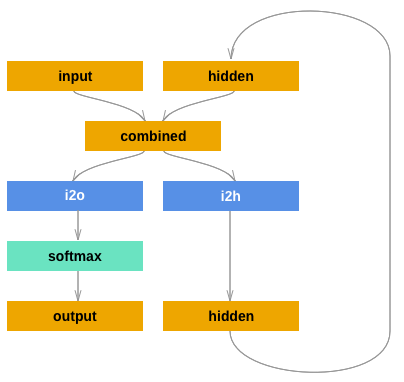

In [54]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(in_features=input_size + hidden_size,
                             out_features=hidden_size)
        # hidden_size is for the tensor that needs to be predicted 
        # based on the input_size tensor that is provided by the 
        # current letter 
        self.h2o = nn.Linear(in_features=hidden_size,
                             out_features=output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)
        hidden = self.i2h(combined)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        # initing the hidden as zeros to begin with
        return Variable(torch.zeros(1, self.hidden_size))

In [50]:
def randomTrainingExample():
    categ = crnn.randomChoice(all_categs)  # 0 to 18
    name = crnn.randomChoice(category_lines[categ])  # one of names from above categ 
    categ_tensor = torch.tensor([all_categs.index(categ)],
                                dtype=torch.long)
    name_tensor = crnn.lineToTensor(name)
    return categ, name, categ_tensor, name_tensor

In [51]:
for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)

category = Chinese / line = Lau
category = Polish / line = Zdunowski
category = French / line = Babineaux
category = Chinese / line = Yang
category = Korean / line = San
category = Portuguese / line = Belo
category = Russian / line = Babchenko
category = Vietnamese / line = Trang
category = Czech / line = Peary
category = English / line = Kinsley


In [52]:
criterion = nn.NLLLoss()
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn
optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

In [ ]:
import time
import math

n_epochs = 100000
print_every = 5000
plot_every = 1000

start = time.time()

# Keep track of losses for plotting
current_loss = 0
all_losses = []

for epoch in range(1, n_epochs + 1):
    # Get a random training input and target
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = crnn.train(category_tensor, line_tensor)  # Will error out
    current_loss += loss
    
    # Print epoch number, loss, name and guess
    if epoch % print_every == 0:
        guess, guess_i = categFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (epoch, epoch / n_epochs * 100, 
                                                crnn.time_since(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if epoch % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0
# The above code will fail, as the train function will not have the rnn object required for it